# Ensemble1
앙상블 기법 voting, bagging, random forest에 대한 실습을 진행합니다.  
폐암 진단 데이터를 이용한 분류기 만들기 앙상블입니다.  

In [42]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
# sklearn 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB     
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Voting : hard & soft
sklearn 내장 데이터인 breast cancer dataset을 사용했습니다.  

In [3]:
# load dataset
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X,y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1004)

In [5]:
y_train

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [6]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.921053


In [7]:
dt = DecisionTreeClassifier(random_state=318)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.885965


In [8]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.894737


In [9]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.868421


In [10]:
# base model 설정
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=318)
knn = KNeighborsClassifier(n_neighbors=9)

# 앙상블 모델 - hard, soft 설정
vo_hard = VotingClassifier(estimators=[('LR',lr),('dt',dt),('KNN',knn)], voting='hard')
vo_soft = VotingClassifier(estimators=[('LR',lr),('dt',dt),('KNN',knn)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_hard.fit(X_train,y_train)
pred_h = vo_hard.predict(X_test)
print('Hard Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred_h)))

vo_soft.fit(X_train,y_train)
pred_s = vo_soft.predict(X_test)
print('Soft Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred_s)))

Hard Voting 분류기 정확도: 0.921053
Soft Voting 분류기 정확도: 0.929825


미세하게 soft voting으로 만든 앙상블 모델이 가장 좋은 성능을 가집니다.

* 나이브베이즈와 바로 전 시간에 배운 SVM 모델로도 만들어볼게요!

In [11]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.903509


In [12]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.868421


In [13]:
# svc 추가
# base model 설정
nb = GaussianNB()
svc = SVC(probability=True)

# 앙상블 모델 - hard, soft 설정
vo_hard = VotingClassifier(estimators=[('nb',nb),('svc',svc)], voting='hard')
vo_soft = VotingClassifier(estimators=[('nb',nb),('svc',svc)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_hard.fit(X_train,y_train)
pred_h = vo_hard.predict(X_test)
print('Hard Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred_h)))

vo_soft.fit(X_train,y_train)
pred_s = vo_soft.predict(X_test)
print('Soft Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred_s)))

Hard Voting 분류기 정확도: 0.912281
Soft Voting 분류기 정확도: 0.885965


나이브베이즈와 svm 으로 만든 앙상블 모델은 hard voting이 성능이 제일 좋았습니다.  무조건 soft가 더 좋은 것은 아닌 것을 보여주네요

# 2. Bagging

Scikit-Learn 의 ensemble 서브패키지는 배깅 모형 결합을 위한 BaggingClassifier 클래스를 제공한다. 사용법은 다음과 같다.  

- base_estimator: 기본 모형  
- n_estimators: 모형 갯수. 디폴트 10  
- bootstrap: 데이터의 중복 사용 여부. 디폴트 True  
- max_samples: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0  
- bootstrap_features: 특징 차원의 중복 사용 여부. 디폴트 False  
- max_features: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0  

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [77]:
# model
clf = DecisionTreeClassifier(random_state=318)
eclf = BaggingClassifier(clf, oob_score=True)

In [78]:
eclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=318,
 

In [79]:
e_pred = eclf.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, e_pred)))

test acurracy : 0.912281


# 3. Boosting

## 3-1. AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
AdaB = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500,
    learning_rate=0.05, random_state=12)

In [32]:
AdaB.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [33]:
pred = AdaB.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.885965


In [34]:
# Feature Importances
AdaB.feature_importances_ 

array([0.00085982, 0.04530132, 0.00249449, 0.01092249, 0.01629553,
       0.0226229 , 0.03444248, 0.11355715, 0.0001356 , 0.01329435,
       0.00014356, 0.01326259, 0.00072159, 0.09995353, 0.05138189,
       0.03579589, 0.00136265, 0.13454698, 0.00238076, 0.01970561,
       0.01075521, 0.05915637, 0.05229078, 0.06943331, 0.04546389,
       0.00395109, 0.01112496, 0.08217454, 0.03321487, 0.01325378])

In [37]:
def feature_impo(model,data):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,data.columns)), columns=['Value','Feature'])
    plt.figure(figsize=(20, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.show()

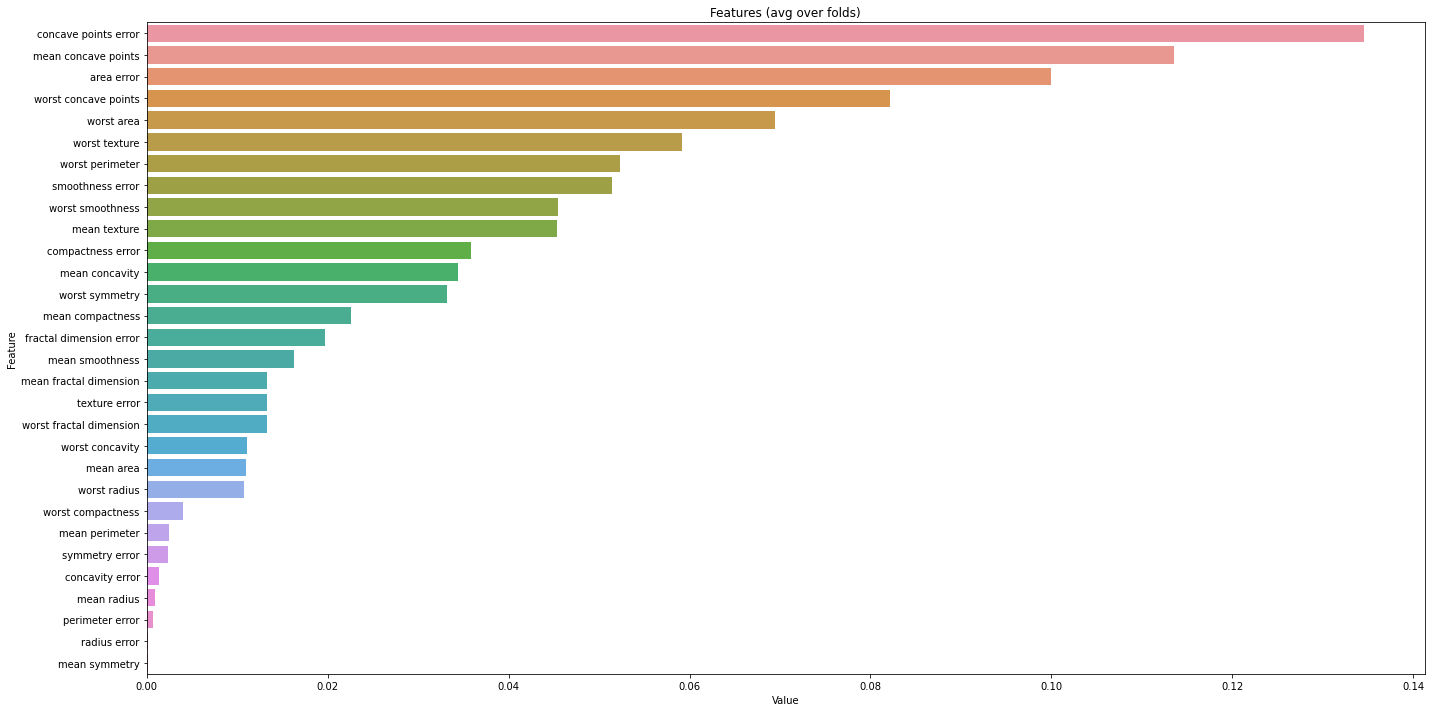

In [43]:
feature_impo(AdaB,data)

## 3-2 Gradient Boost

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
# model
gbm = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05)

In [53]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
pred = gbm.predict(X_test)
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, pred)))

test acurracy : 0.929825


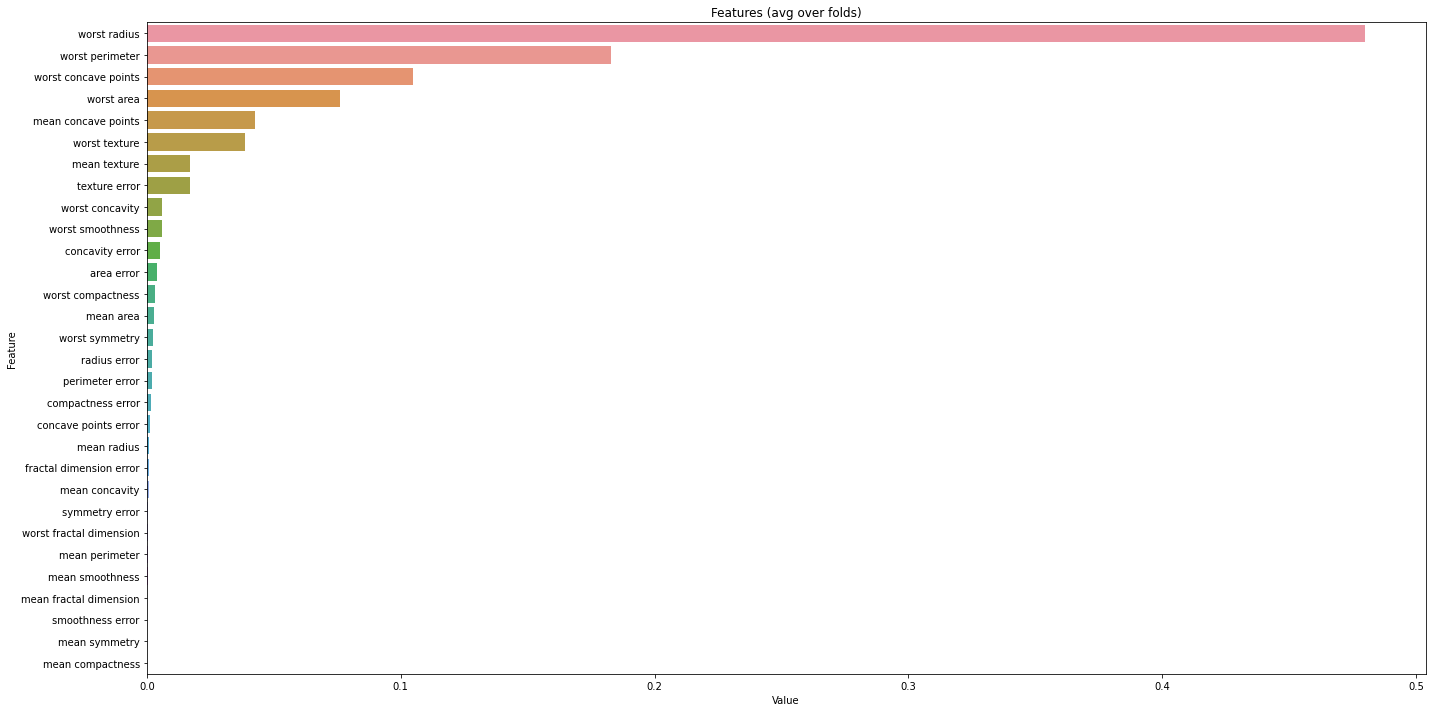

In [55]:
feature_impo(gbm,data)

## 3-3 XGBoost

In [65]:
from xgboost import XGBClassifier
import xgboost as xgb

In [66]:
# model
Xgb = XGBClassifier(n_estimators=1000, max_depth=2, learning_rate=0.05, nthread=7)
Xgb.fit(X_train, y_train)
y_pred = Xgb.predict(X_test)

In [67]:
print('test acurracy : {0:4f}'.format(accuracy_score(y_test, y_pred)))

test acurracy : 0.947368


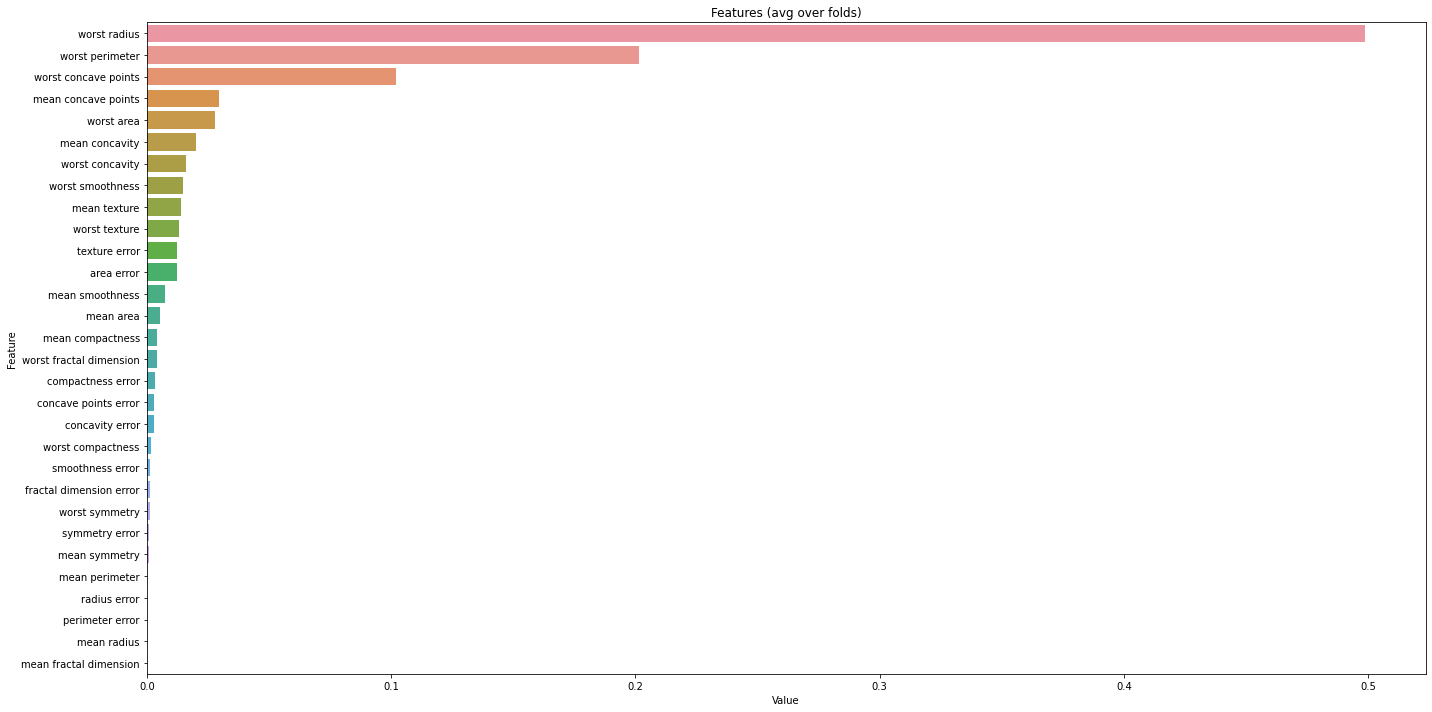

In [68]:
feature_impo(Xgb,data)